In [23]:

"""
Vehicle Price Prediction using a Hedonic Model.

This script loads vehicle data, cleans it, and trains a Random Forest Regressor
to predict vehicle prices. The model's output, particularly the feature
importance, allows us to understand the implicit value of each vehicle
characteristic (e.g., make, model, year, mileage), which is the core
concept of the Hedonic Pricing Model.
"""

# --- 1. Import Necessary Libraries ---
# Pandas for data manipulation and sklearn for preprocessing tasks.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# --- 2. Load and Prepare the Data ---
# This section handles loading the dataset and cleaning it for the model.


file_path = '/Users/chandu/MachineLearning_Project/Unified_mentor(Internship)/Projects/My_List/Vehicle Price Prediction/VPP.csv'
df = pd.read_csv(file_path)
print(f"Dataset '{file_path}' loaded successfully.")


# --- Data Cleaning ---

df.dropna(subset=['price'], inplace=True)
df = df[df['price'] > 0]
print(f"Cleaned data shape after removing invalid prices: {df.shape}")

# Drop columns that are too complex (like long text descriptions) or redundant.
df.drop(['name', 'description'], axis=1, inplace=True)

# Handle missing values in other columns.
for col in ['cylinders', 'mileage', 'doors']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

for col in ['fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'engine']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled.")

# --- Hedonic Feature Creation (One-Hot Encoding) ---
# Convert categorical features into individual numerical features.
categorical_features = ['make', 'model', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain', 'engine']
df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("Categorical features converted to hedonic numerical features.")

# Separate the features (X) from the target variable (y).
X = df_processed.drop('price', axis=1)
y = df_processed['price']
print("\nFeatures (X) and target (y) have been separated.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData has been split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# --- 4. Scale the Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nFeatures have been scaled.")
print("First 5 rows of the scaled training data (X_train_scaled):")
print(X_train_scaled.head())

print("\n--- Data Preparation Complete ---")
print("The variables X_train_scaled, X_test_scaled, y_train, and y_test are now ready for model training.")




Dataset '/Users/chandu/MachineLearning_Project/Unified_mentor(Internship)/Projects/My_List/Vehicle Price Prediction/VPP.csv' loaded successfully.
Cleaned data shape after removing invalid prices: (978, 17)
Missing values handled.
Categorical features converted to hedonic numerical features.

Features (X) and target (y) have been separated.
Shape of X: (978, 876)
Shape of y: (978,)

Data has been split into training and testing sets.
X_train shape: (782, 876)
X_test shape: (196, 876)

Features have been scaled.
First 5 rows of the scaled training data (X_train_scaled):
       year  cylinders   mileage     doors  make_Audi  make_BMW  make_Buick  \
0  0.293013  -0.675730  9.505994  0.216164  -0.113813 -0.139845   -0.087932   
1  0.293013  -0.675730 -0.111308  0.216164  -0.113813 -0.139845   -0.087932   
2  0.293013  -0.675730 -0.097036  0.216164  -0.113813 -0.139845   -0.087932   
3  0.293013   0.808598 -0.103153 -3.305502  -0.113813 -0.139845   -0.087932   
4  0.293013   0.808598 -0.1113

In [19]:
# --- 5. Choose and Train the Model ---
# We use a RandomForestRegressor.
# Hedonic analysis.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("\n--- Training the Random Forest Regressor Model ---")
model.fit(X_train_scaled, y_train)
print("Model training complete.")




--- Training the Random Forest Regressor Model ---
Model training complete.


In [20]:
# --- 6. Make Predictions on the Test Data ---
y_pred = model.predict(X_test_scaled)
print("\n--- Predictions Made on the Test Set ---")




--- Predictions Made on the Test Set ---


In [21]:
# --- 7. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")
print("\nMAE tells us the average error in the price prediction.")
print("R² tells us how much of the price variation the model can explain.")




--- Model Evaluation ---
Mean Absolute Error (MAE): $4,195.50
R-squared (R²) Score: 0.8453

MAE tells us the average error in the price prediction.
R² tells us how much of the price variation the model can explain.



--- Visualizing What the Model Learned (Hedonic Insights) ---


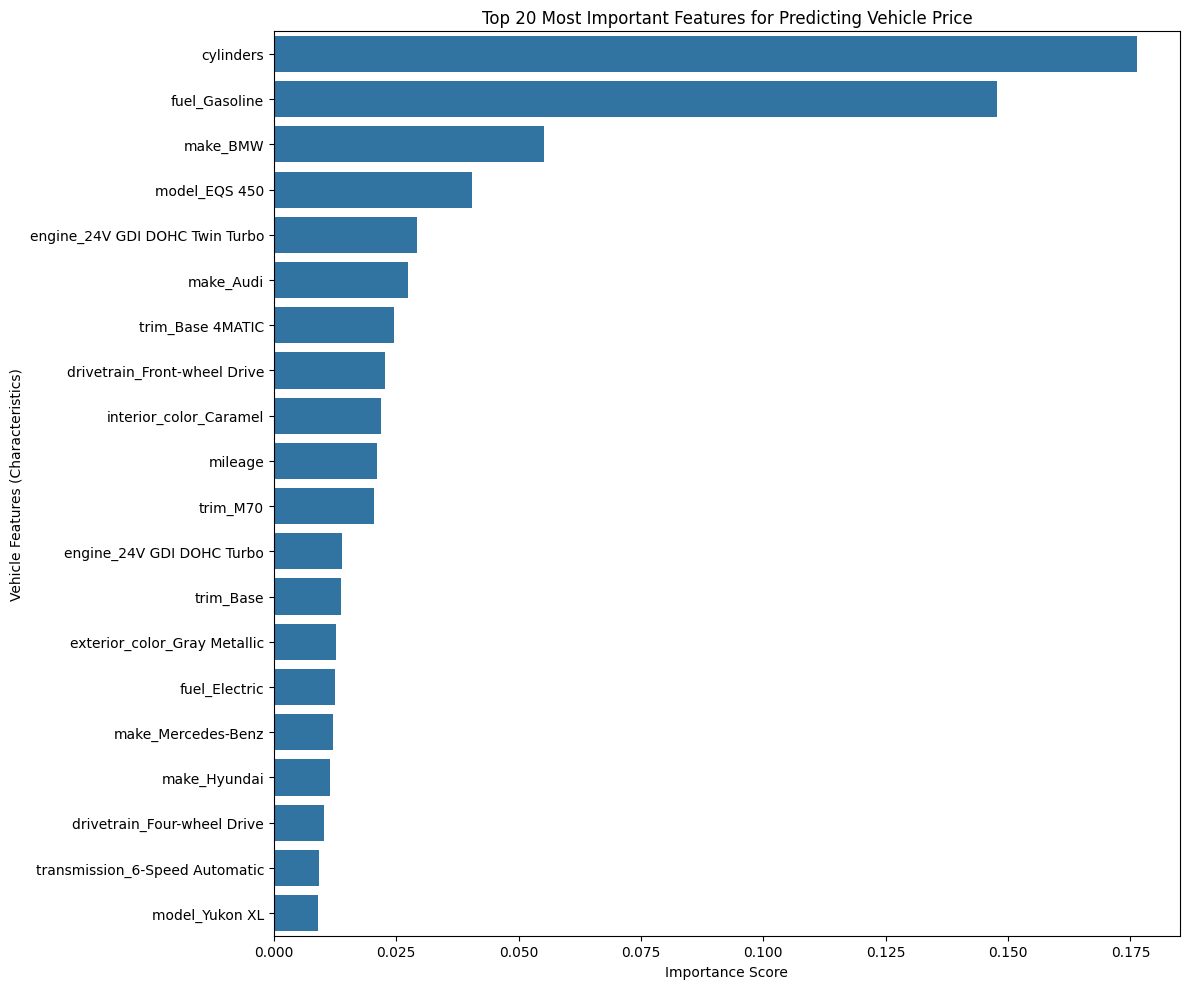


The plot above shows which features the model found most predictive.
A higher score means the feature had a greater impact on the final price.

Top 5 most important features:
cylinders                         0.176315
fuel_Gasoline                     0.147670
make_BMW                          0.055281
model_EQS 450                     0.040540
engine_24V GDI DOHC Twin Turbo    0.029348
dtype: float64


In [22]:
# --- 8. Visualize Hedonic Insights: Feature Importance ---
# This is the key output for our Hedonic analysis. We visualize which
print("\n--- Visualizing What the Model Learned (Hedonic Insights) ---")
importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = importances.sort_values(ascending=False)

# Plotting the top 20 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_importances.head(20), y=sorted_importances.head(20).index)
plt.xlabel('Importance Score')
plt.ylabel('Vehicle Features (Characteristics)')
plt.title('Top 20 Most Important Features for Predicting Vehicle Price')
plt.tight_layout()
plt.show()

print("\nThe plot above shows which features the model found most predictive.")
print("A higher score means the feature had a greater impact on the final price.")
print("\nTop 5 most important features:")
print(sorted_importances.head(5))

